### Problem Statement.
#### Predict the Burned Area of Forest Fire with Neural Networks.

In [97]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
sns.set_style('darkgrid')
#from imblearn.pipeline import Pipeline
from dataprep.eda import plot, plot_correlation, plot_missing, create_report
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV

In [4]:
import warnings
warnings.filterwarnings('ignore')

from scikeras.wrappers import KerasClassifier
# feature extraction
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [16]:
# Importing Dataset
df = pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## Data Exploration

In [17]:
df1 = df.iloc[:,:11]
df2 = df.iloc[:,-1]

In [22]:
raw_data = pd.concat([df1, df2], axis=1)

In [23]:
raw_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [24]:
# print shape of dataset with rows and columns
print(raw_data.shape)
# print top 5 records
raw_data.head()

(517, 12)


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [25]:
raw_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [26]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [27]:
raw_data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [28]:
raw_data[raw_data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


In [29]:
raw_data.drop_duplicates(inplace=True)

In [32]:
raw_data = raw_data.reset_index()

In [33]:
raw_data.drop('index',axis=1,inplace=True)

In [34]:
raw_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
504,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
505,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
506,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
507,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [35]:
raw_data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000


## Data Visualization

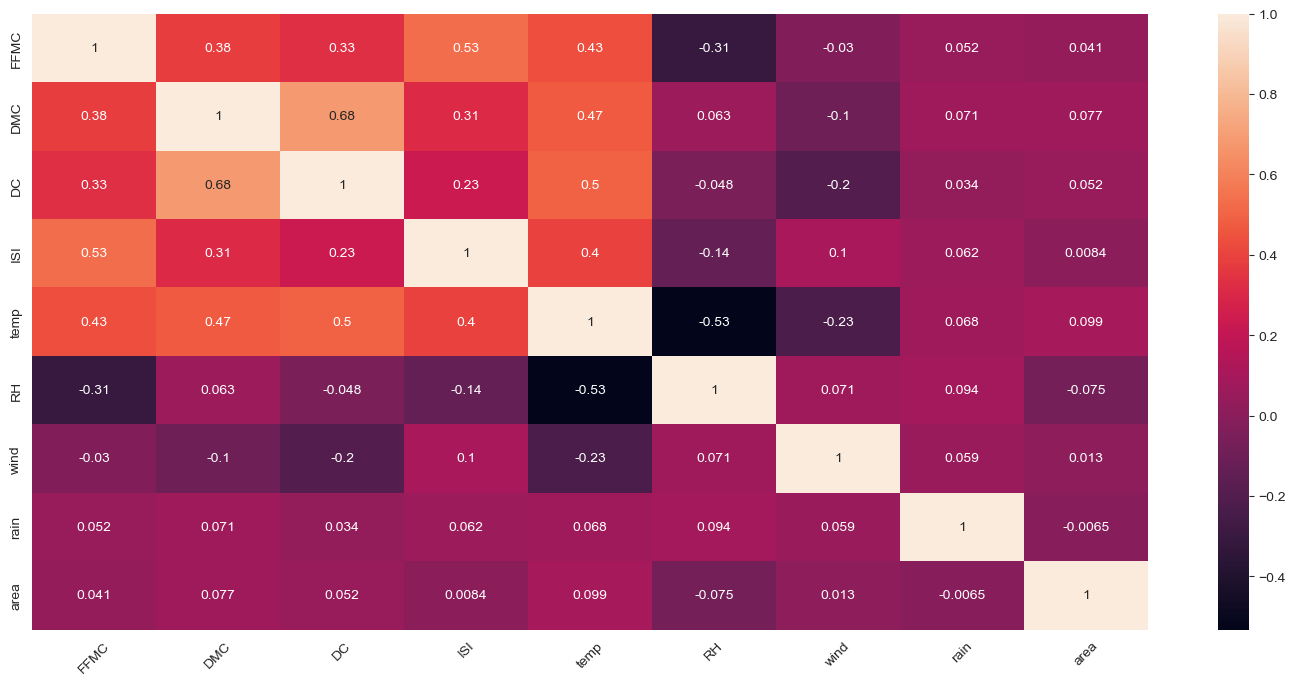

In [36]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(raw_data.corr(), annot=True);
plt.xticks(rotation=45)
plt.show()

#### Observation
+ DMC and DC are positively Corelated

In [38]:
# For plotting purpose lets divide the columns into Continious and Discrete Features.

# List of Numerical Variables

numerical_features=[feature for feature in raw_data.columns if raw_data[feature].dtypes != 'O']
print('Number of numerical variables:', len(numerical_features))

## List of Discrete Features
discrete_feature=[feature for feature in numerical_features if len(raw_data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

## List of Continious Features
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Number of numerical variables: 9
Discrete Variables Count: 2
Continuous Feature Count 7


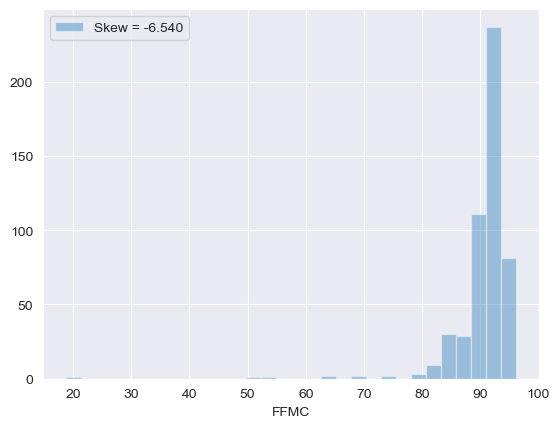

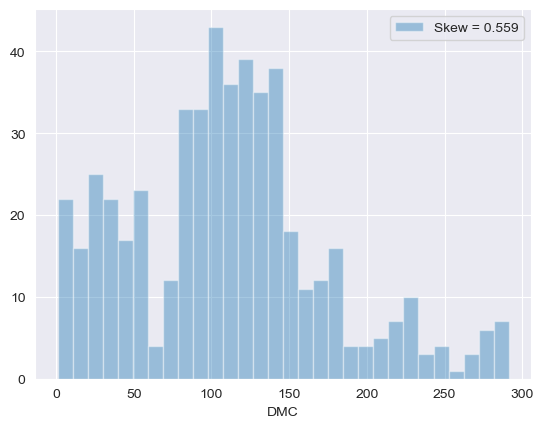

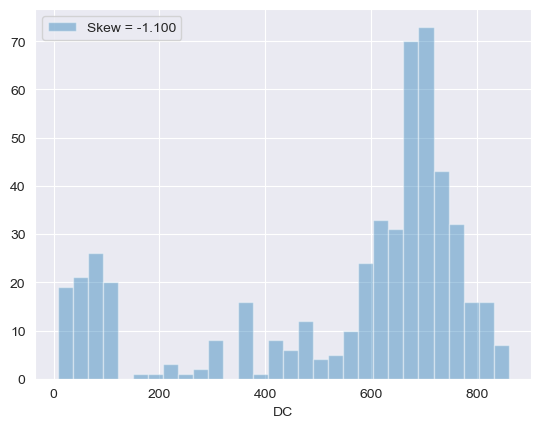

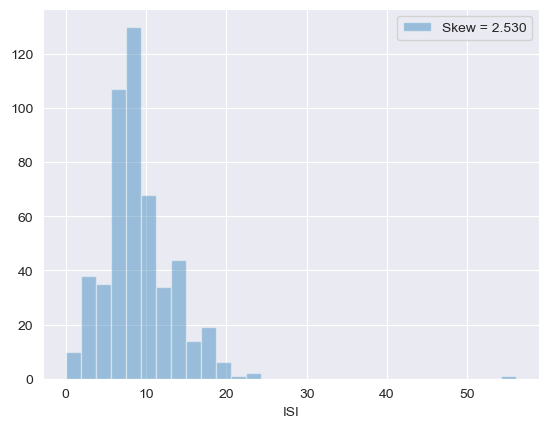

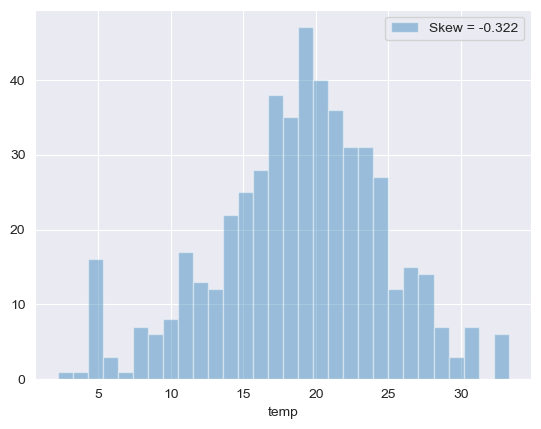

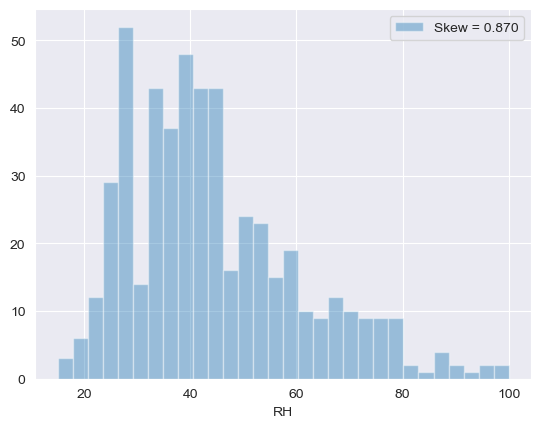

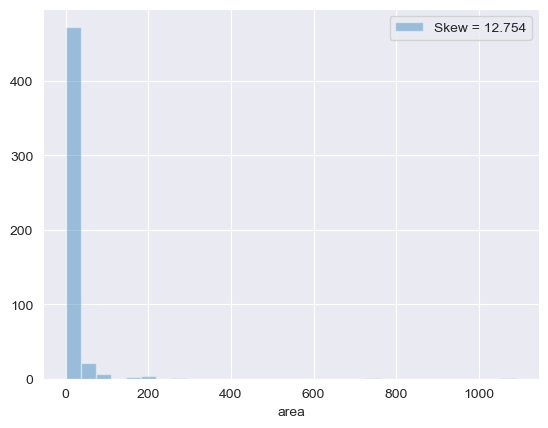

In [39]:
for feat in continuous_feature:
    skew = raw_data[feat].skew()
    sns.distplot(raw_data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

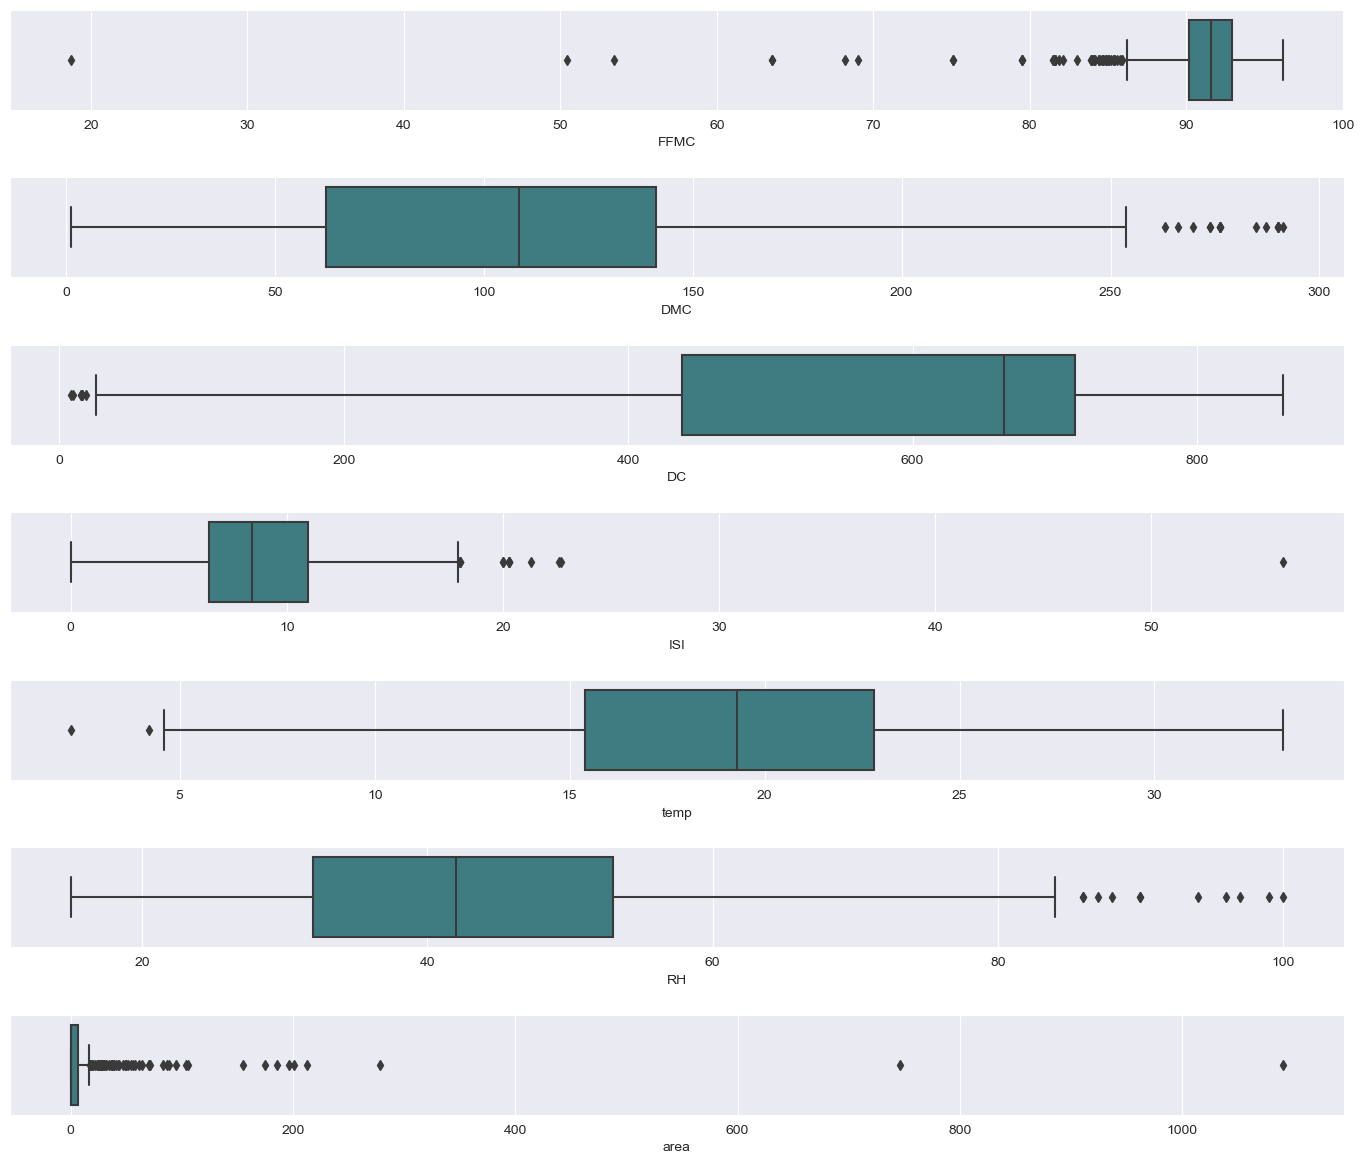

In [40]:
## Outlier detection using BoxPlot

ot=raw_data.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

+ There are many Outliers in almost all the columns, hence we will proceed to keep them and proceed with our analysis.

### Visualize the distribution of 'Area' and taking insights

Skew: 12.75393973327039
Kurtosis: 191.2657222312397


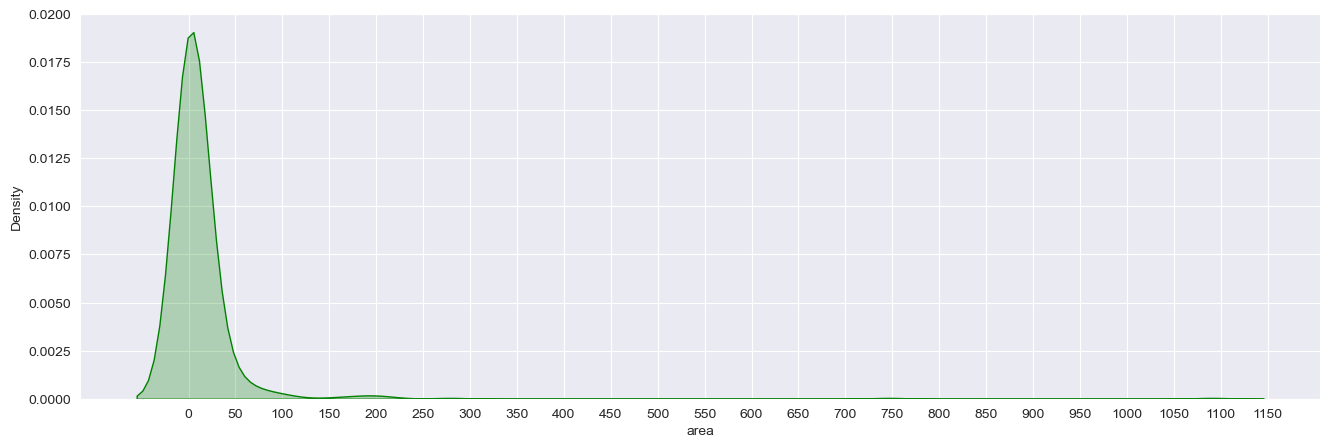

In [41]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(raw_data['area'].skew()))
print("Kurtosis: {}".format(raw_data['area'].kurtosis()))
ax = sns.kdeplot(raw_data['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

#### Few observations:
+ The data is highly skewed with a value of +12.84 and huge kurtosis value of 194.

+ It even tells you that majority of the forest fires do not cover a large area, most of the damaged area is under 50 hectares of land.

+ We can apply tranformation to fix the skewnesss and kurtosis, however we will have to inverse transform before submitting the output.

+ Outlier Check: There are 4 outlier instances in our area columns but the questions is should we drop it or not? (Will get back to this in the outlier treatment step)

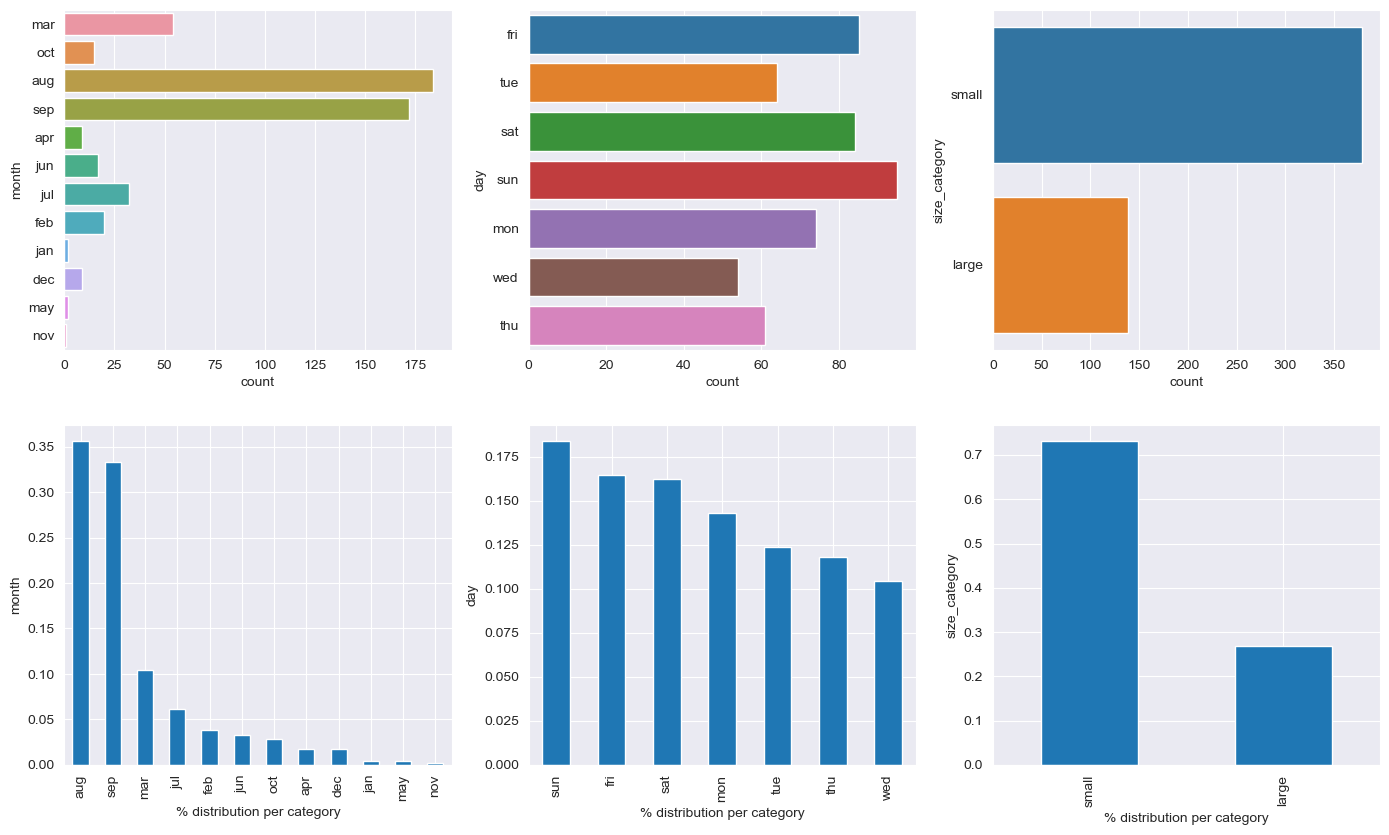

In [43]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

# analyzing categorical columns

plt.figure(figsize=(14,12))
for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data=df,y=col)
    plt.subplot(3,3,i+3)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

#### Inference:
+ We can see that about 70% of the forest fires have occurred in month of Aug and Sept.
+ Also the Target data is imbalanced, roughly 75% is small fire and 25% is large.

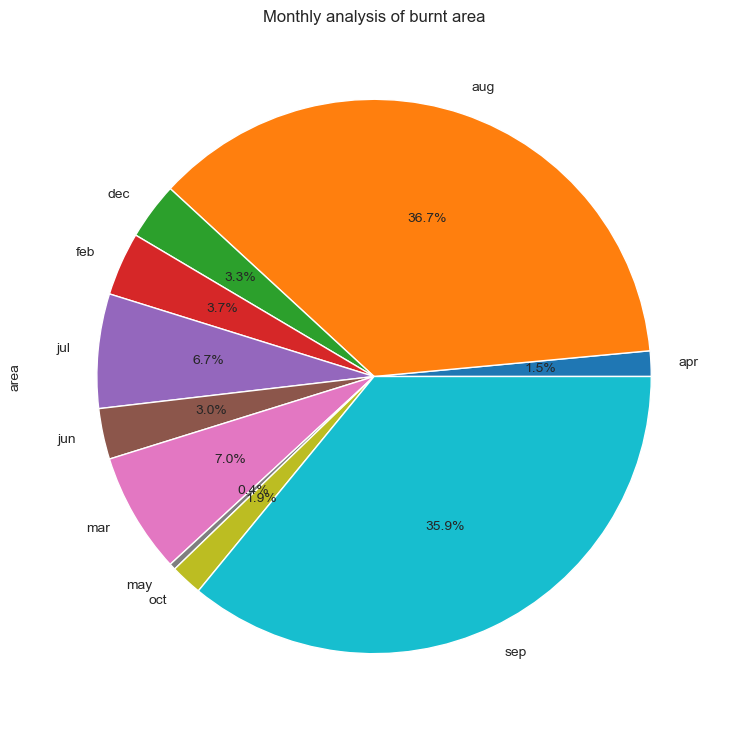

In [44]:
# monthly analysis of burnt area, where the condition is: area>0

areaburnt=df[df['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(9,9),autopct='%0.1f%%')
plt.show()

#### Interesting to see that the about 70% of the forest fires occur in the month of august and september, confirming our observation from above bar graphs.

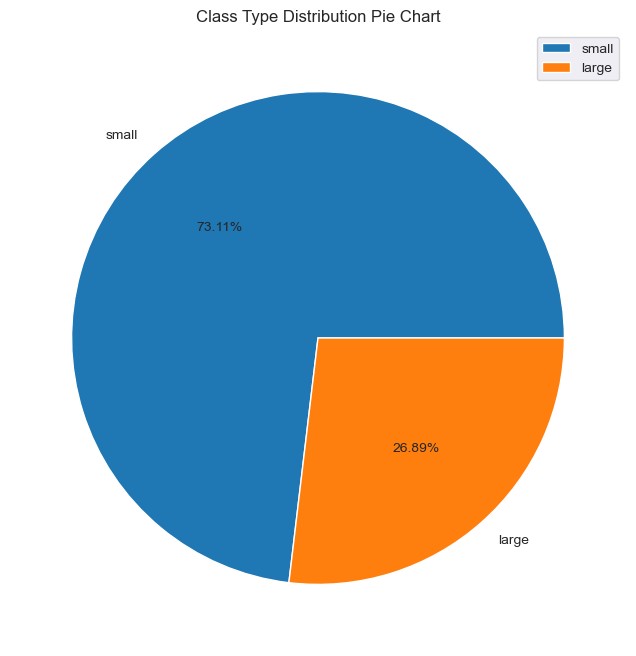

In [45]:
plt.figure(figsize = (12,8))
plt.pie(df['size_category'].value_counts(),
       labels=df.size_category.unique(),
       autopct= '%.2f%%')
plt.legend(loc= 'best')
plt.title("Class Type Distribution Pie Chart")
plt.show()

#### We can infer that its an imbalanced data, that is the Target variable has imbalanced types.

## Feature Engineering

In [46]:
continuous_feature=[feature for feature in raw_data.columns if raw_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 9


In [47]:
raw_data[continuous_feature]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [48]:
df_standard_scaled = raw_data.copy()
features = df_standard_scaled[continuous_feature]

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,-0.202791,small
1,oct,tue,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,-0.202791,small
2,oct,sat,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,-0.202791,small
3,mar,fri,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,-0.202791,small
4,mar,sun,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,-0.202791,small


#### Converting Categorical Variable into Label by using Get Dummies FeatureData Pre-Processing

In [50]:
df = df_standard_scaled.copy()
df.drop('size_category',axis=1, inplace =True)
df = pd.get_dummies(df.iloc[:,:])
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,-0.202791,0,...,0,0,0,1,0,0,0,0,0,0
1,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,-0.202791,0,...,0,1,0,0,0,0,0,0,1,0
2,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,-0.202791,0,...,0,1,0,0,0,1,0,0,0,0
3,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,-0.202791,0,...,0,0,0,1,0,0,0,0,0,0
4,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,-0.202791,0,...,0,0,0,0,0,0,1,0,0,0


In [51]:
df['size_category'] = raw_data.size_category
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,...,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,size_category
0,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,-0.202791,0,...,0,0,1,0,0,0,0,0,0,0
1,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,-0.202791,0,...,1,0,0,0,0,0,0,1,0,0
2,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,-0.202791,0,...,1,0,0,0,1,0,0,0,0,0
3,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,-0.202791,0,...,0,0,1,0,0,0,0,0,0,0
4,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,-0.202791,0,...,0,0,0,0,0,1,0,0,0,0


### Split the data into X and y

In [52]:
# split into input (X) and output (y) variables
X = df.drop('size_category', axis = 1)

y=  df.size_category

In [53]:
# Splitting data into test data and train data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3, stratify=y)

In [54]:
## Build the Neural Network model and optimize the hyper-parameter

In [82]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(64,input_dim=28,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(learning_rate=0.01)
    model1.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model1

In [83]:
model1 =KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10]
epochs=[100,200,500]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10,n_jobs=-1)

In [84]:
grid_result1 = grid.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [85]:
print('Best {}, using {}'.format(grid_result1.best_score_,grid_result1.best_params_))
means = grid_result1.cv_results_["mean_test_score"]
stds = grid_result1.cv_results_["std_test_score"]
params = grid_result1.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9381455399061034, using {'batch_size': 10, 'epochs': 500}
0.9213615023474178,0.01904159604758049 with {'batch_size': 10, 'epochs': 100}
0.9184663536776213,0.028866346917480603 with {'batch_size': 10, 'epochs': 200}
0.9381455399061034,0.026212365398869123 with {'batch_size': 10, 'epochs': 500}
0.9101721439749608,0.018742791764106245 with {'batch_size': 10, 'epochs': 1000}


### Hyperparameter Tuning: Optimal Droupout rate

In [103]:
from keras.layers  import Dropout

def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(64,input_dim=28,activation='relu'))
    model2.add(Dropout(dropout_rate))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dropout(dropout_rate))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dropout(dropout_rate))
    model2.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(learning_rate=0.01)
    model2.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model2

In [104]:
model2=KerasClassifier(build_fn=create_model,batch_size=10,epochs=500,verbose=0,dropout_rate=dropout_rate)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

In [105]:
grid_result2 = grid2.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................
[CV 1/5; 1/6] END .............dropout_rate=0.0;, score=0.944 total time=  34.9s
[CV 2/5; 1/6] START dropout_rate=0.0............................................
[CV 2/5; 1/6] END .............dropout_rate=0.0;, score=0.930 total time=  23.9s
[CV 3/5; 1/6] START dropout_rate=0.0............................................
[CV 3/5; 1/6] END .............dropout_rate=0.0;, score=0.915 total time=  19.4s
[CV 4/5; 1/6] START dropout_rate=0.0............................................
[CV 4/5; 1/6] END .............dropout_rate=0.0;, score=0.915 total time=  19.2s
[CV 5/5; 1/6] START dropout_rate=0.0............................................
[CV 5/5; 1/6] END .............dropout_rate=0.0;, score=0.915 total time=  16.9s
[CV 1/5; 2/6] START dropout_rate=0.1............................................
[CV 1/5; 2/6] END .............dropout_rate=0.1;,

In [106]:
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9269561815336462, using {'dropout_rate': 0.4}
0.9241001564945227,0.011542465674232085 with {'dropout_rate': 0.0}
0.9241001564945227,0.023021190044986876 with {'dropout_rate': 0.1}
0.9241001564945227,0.0262425963270793 with {'dropout_rate': 0.2}
0.9185054773082942,0.018806872101403305 with {'dropout_rate': 0.3}
0.9269561815336462,0.013845343803225794 with {'dropout_rate': 0.4}
0.9184272300469484,0.03508977475125368 with {'dropout_rate': 0.5}


In [107]:

def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(64,input_dim=28,activation=activation_function, kernel_initializer= init))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation=activation_function, kernel_initializer= init))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation=activation_function, kernel_initializer= init))
    model3.add(Dropout(0.3))
    model3.add(Dense(units=1,activation='sigmoid'))
    
    adam=Adam(learning_rate=0.01)
    model3.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model3

In [108]:
model3=KerasClassifier(build_fn=create_model,batch_size=10,epochs=500,verbose=0,activation_function=activation_function,init=init)
activation_function=['softmax','tanh','relu']
init=['normal','uniform','zero']
param_grid=dict(activation_function=activation_function,init=init)
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(),verbose=10,n_jobs=-1)

In [109]:
grid_result3 = grid3.fit(X_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [110]:
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.8950537634408601, using {'activation_function': 'tanh', 'init': 'uniform'}
0.8165591397849461,0.04577968827922738 with {'activation_function': 'softmax', 'init': 'normal'}
0.7974193548387095,0.031235402417832788 with {'activation_function': 'softmax', 'init': 'uniform'}
0.8036559139784945,0.03684643598869223 with {'activation_function': 'softmax', 'init': 'zero'}
0.8819354838709677,0.0347456609524657 with {'activation_function': 'tanh', 'init': 'normal'}
0.8950537634408601,0.039200000943839165 with {'activation_function': 'tanh', 'init': 'uniform'}
0.7324731182795698,0.053747954758927526 with {'activation_function': 'tanh', 'init': 'zero'}
0.8365591397849462,0.041232037715980614 with {'activation_function': 'relu', 'init': 'normal'}
0.8167741935483871,0.04587051908092874 with {'activation_function': 'relu', 'init': 'uniform'}
0.7324731182795698,0.053747954758927526 with {'activation_function': 'relu', 'init': 'zero'}


In [113]:
 # create ANN model
model = Sequential()
# Defining the first layer of the model
model.add(Dense(units=50, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='tanh'))
model.add(Dropout(0.2))        
# Defining the Second layer of the model
model.add(Dense(units=6, kernel_initializer='uniform', activation='tanh'))
model.add(Dropout(0.2))  
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with best parameters
history = model.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
24/24 [==============================] - 1s 10ms/step - loss: 0.6893 - accuracy: 0.7437 - val_loss: 0.6861 - val_accuracy: 0.6949
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6757 - accuracy: 0.7479 - val_loss: 0.6687 - val_accuracy: 0.6949
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6398 - accuracy: 0.7605 - val_loss: 0.6316 - val_accuracy: 0.6949
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5844 - accuracy: 0.7647 - val_loss: 0.6015 - val_accuracy: 0.7034
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5528 - accuracy: 0.7647 - val_loss: 0.5878 - val_accuracy: 0.7119
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5376 - accuracy: 0.7689 - val_loss: 0.5797 - val_accuracy: 0.7203
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5092 - accuracy: 0.7731 - val_loss: 0.5670 - val_accuracy: 0.7288
Epoch 8/100


Epoch 59/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9874 - val_loss: 0.0826 - val_accuracy: 0.9746
Epoch 60/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9958 - val_loss: 0.0702 - val_accuracy: 0.9915
Epoch 61/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0474 - accuracy: 0.9958 - val_loss: 0.0851 - val_accuracy: 0.9746
Epoch 62/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0459 - accuracy: 0.9958 - val_loss: 0.0758 - val_accuracy: 0.9746
Epoch 63/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0513 - accuracy: 0.9958 - val_loss: 0.0858 - val_accuracy: 0.9746
Epoch 64/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.9832 - val_loss: 0.0782 - val_accuracy: 0.9746
Epoch 65/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 1.0000 - val_loss: 0.0792 - val_accuracy: 0.9746
Epoch 

### Model Evaluation Train and Test

In [115]:
# evaluate the model
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

16/16 [==============================] - 0s 1ms/step - loss: 0.0937 - accuracy: 0.9745
accuracy: 97.45%


### Predicting values from Model using same dataset.

In [118]:
# generating predictions for test data
y_predict_test = model.predict(X_test) 

# creating table with test price & predicted price for test
test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = y_test
test_prediction['Test_Probability'] = y_predict_test
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

# converting the probability of target variable to binary class of test data
test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
print(test_prediction.shape)
test_prediction.head(10)

5/5 [==============================] - 0s 1ms/step
(153, 3)


,Test_Actual,Test_Probability,Test_Predicted
293,0,0.001610,0
380,1,0.996888,1
36,0,0.001656,0
487,1,0.997036,1
48,0,0.002447,0
470,0,0.036954,0
0,0,0.001664,0
188,1,0.971382,1
385,0,0.001782,0
249,0,0.001790,0


In [119]:
# generating predictions for train data
y_predict_train = model.predict(X_train)

# creating table with test price & predicted price for test
train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = y_train
train_prediction['Train_Probability'] = y_predict_train
train_prediction['Train_Predicted'] = train_prediction['Train_Probability'].apply(probToBinary)
print(train_prediction.shape)
train_prediction.head(10)

12/12 [==============================] - 0s 1ms/step
(356, 3)


,Train_Actual,Train_Probability,Train_Predicted
21,0,0.002298,0
389,0,0.001820,0
253,1,0.995700,1
182,1,0.869621,1
123,0,0.001677,0
261,1,0.729496,1
210,1,0.997036,1
415,0,0.013677,0
77,0,0.001812,0
116,0,0.002209,0


### Classification Report

In [120]:
# print the classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy score for Test Data    = ", np.round(accuracy_score(test_prediction['Test_Actual'],test_prediction['Test_Predicted']),2)*100,"%")
print("Confusion Matrix for Test Data  =\n", confusion_matrix(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))
print("Classification Report for Test Data  =\n", classification_report(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))

Accuracy score for Test Data    =  93.0 %
Confusion Matrix for Test Data  =
 [[107   5]
 [  5  36]]
Classification Report for Test Data  =
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       112
           1       0.88      0.88      0.88        41

    accuracy                           0.93       153
   macro avg       0.92      0.92      0.92       153
weighted avg       0.93      0.93      0.93       153



In [122]:
# print the classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy score for Train Data    = ", np.round(accuracy_score(train_prediction['Train_Actual'],train_prediction['Train_Predicted']),2)*100,"%")
print("Confusion Matrix for Train Data  =\n", confusion_matrix(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))
print("Classification Report for Train Data  =\n", classification_report(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))

Accuracy score for Train Data    =  99.0 %
Confusion Matrix for Train Data  =
 [[257   2]
 [  1  96]]
Classification Report for Train Data  =
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       259
           1       0.98      0.99      0.98        97

    accuracy                           0.99       356
   macro avg       0.99      0.99      0.99       356
weighted avg       0.99      0.99      0.99       356



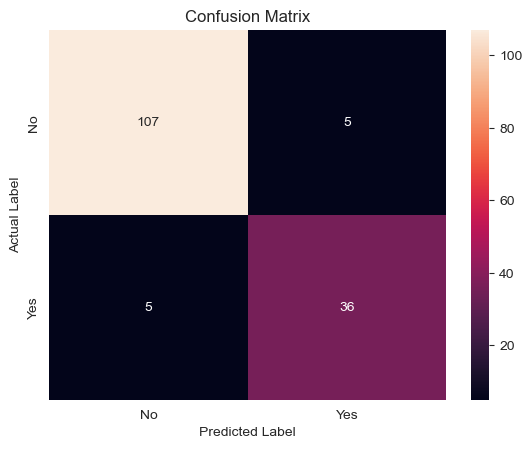

In [123]:
## Confusion Matrix

# plot confusion matrix to describe the performance of classifier.

cm_df=confusion_matrix(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

### ROC - AUC Curve

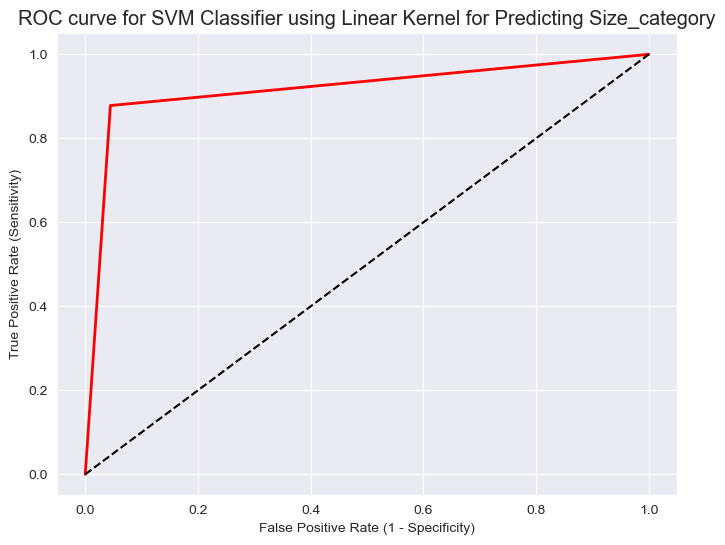

ROC AUC : 0.9167


In [125]:
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV

fpr, tpr, thresholds = roc_curve(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])

plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, linewidth=2, color='red')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC_AUC = roc_auc_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])

print('ROC AUC : {:.4f}'.format(ROC_AUC))

### After Optimizing the Hyper Paramters in Neural Network we are getting the ROC AUC of 0.9167